In [22]:
import pandas as pd 
from pandas import plotting as pld
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
### https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
#### Website https://www.kaggle.com/c/forest-cover-type-kernels-only/data
#### https://github.com/perborgen/LogisticRegression/blob/master/Titanic_Logistic_Model_Fit_AllIn.py
train=pd.read_csv('/Users/michaelremington/Documents/Kaggel Competitions/forest-cover-type-kernels-only/train.csv')
test=pd.read_csv('/Users/michaelremington/Documents/Kaggel Competitions/forest-cover-type-kernels-only/test.csv')
######## Data Clean Up ###########
## Tree Key #######
treekey=[[1,'Spruce/Fir'],
[2,'Lodgepole Pine'],
[3,'Ponderosa Pine'],
[4,'Cottonwood/Willow'],
[5,'Aspen'],
[6,'Douglas-fir'],
[7,'Krummholz']]
treekey=pd.DataFrame(treekey, columns = ['key' , 'Tree Type']) 
#########
####### Graphing Set
#########
train_2=train.merge(treekey, left_on='Cover_Type', right_on='key')
tg=train_2.rename(columns={"Horizontal_Distance_To_Hydrology":"x Dist Hydrology",
                         "Horizontal_Distance_To_Roadways":"x Dist Roadways",
                        "Vertical_Distance_To_Hydrology":"y Dist Hydrology",
                        })
tg=tg[['Tree Type','Cover_Type','Elevation', 'Aspect', 'Slope','x Dist Hydrology','x Dist Roadways','y Dist Hydrology']]

#########
## Wilderness Type
#######
wt=train.iloc[:,1:15]
wt=dependent.iloc[:,10:14].merge(train.iloc[:,0], left_index=True, right_index=True)
wt=wt.melt(id_vars =['Id'],
                  var_name ='Wilderness_Type',
                  value_name ='Count'
                   )
#wt.sort_values('Count').head(100)
wt1=wt['Count']==1
wt2=wt[wt1]
wt2['Wilderness_Area']=wt2.Wilderness_Type.str.split("Wilderness_Area", n = 1, expand = True)[1]
wtfin=wt2.iloc[:,[0,3]]
wildernesslabel=[[1,'Rawah Wilderness Area'],
[2,'Neota Wilderness Area'],
[3,'Comanche Peak Wilderness Area'],
[4,'Cache la Poudre Wilderness Area']]
wildkey=pd.DataFrame(wildernesslabel, columns = ['key' , 'Wilderness Label'])
wildkey['key']=wildkey['key'].astype(int)
train=train.merge(wtfin, left_on='Id', right_on='Id')
train['Wilderness_Area']=train['Wilderness_Area'].astype(int)
#
train=train.merge(wildkey,how='left', left_on='Wilderness_Area',right_on='key',validate='many_to_one')
###########
### Soil Type
############
dependent=train.iloc[:,1:55]
d=dependent.iloc[:,14:55].merge(train.iloc[:,0], left_index=True, right_index=True)
d=d.melt(id_vars =['Id'],
                  var_name ='Soil_Type',
                  value_name ='Count'
                   )
d1=d['Count']==1
d2=d[d1]
d2['Soil']=d2.Soil_Type.str.split("Soil_Type", n = 1, expand = True)[1]
dfin=d2.iloc[:,[0,3]]
train=train.merge(dfin, left_on='Id', right_on='Id')
st=[[1,'Cathedral family - Rock outcrop complex, extremely stony.'],
[2,'Vanet - Ratake families complex, very stony.'],
[3,'Haploborolis - Rock outcrop complex, rubbly.'],
[4,'Ratake family - Rock outcrop complex, rubbly.'],
[5,'Vanet family - Rock outcrop complex complex, rubbly.'],
[6,'Vanet - Wetmore families - Rock outcrop complex, stony.'],
[7,'Gothic family.'],
[8,'Supervisor - Limber families complex.'],
[9,'Troutville family, very stony.'],
[10,'Bullwark - Catamount families - Rock outcrop complex, rubbly.'],
[11,'Bullwark - Catamount families - Rock land complex, rubbly.'],
[12,'Legault family - Rock land complex, stony.'],
[13,'Catamount family - Rock land - Bullwark family complex, rubbly.'],
[14,'Pachic Argiborolis - Aquolis complex.'],
[15,'unspecified in the USFS Soil and ELU Survey.'],
[16,'Cryaquolis - Cryoborolis complex.'],
[17,'Gateview family - Cryaquolis complex.'],
[18,'Rogert family, very stony.'],
[19,'Typic Cryaquolis - Borohemists complex.'],
[20,'Typic Cryaquepts - Typic Cryaquolls complex.'],
[21,'Typic Cryaquolls - Leighcan family, till substratum complex.'],
[22,'Leighcan family, till substratum, extremely bouldery.'],
[23,'Leighcan family, till substratum - Typic Cryaquolls complex.'],
[24,'Leighcan family, extremely stony.'],
[25,'Leighcan family, warm, extremely stony.'],
[26,'Granile - Catamount families complex, very stony.'],
[27,'Leighcan family, warm - Rock outcrop complex, extremely stony.'],
[28,'Leighcan family - Rock outcrop complex, extremely stony.'],
[29,'Como - Legault families complex, extremely stony.'],
[30,'Como family - Rock land - Legault family complex, extremely stony.'],
[31,'Leighcan - Catamount families complex, extremely stony.'],
[32,'Catamount family - Rock outcrop - Leighcan family complex, extremely stony.'],
[33,'Leighcan - Catamount families - Rock outcrop complex, extremely stony.'],
[34,'Cryorthents - Rock land complex, extremely stony.'],
[35,'Cryumbrepts - Rock outcrop - Cryaquepts complex.'],
[36,'Bross family - Rock land - Cryumbrepts complex, extremely stony.'],
[37,'Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony. '],
[38,'Leighcan - Moran families - Cryaquolls complex, extremely stony.'],
[39,'Moran family - Cryorthents - Leighcan family complex, extremely stony.'],
[40,'Moran family - Cryorthents - Rock land complex, extremely stony.']]
soilkey=pd.DataFrame(st, columns = ['skey' , 'Soil Label'])
train['Soil']=train['Soil'].astype(int)
train=train.merge(soilkey,how='left', left_on='Soil',right_on='skey',validate='many_to_one')



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area,key,Wilderness Label,Soil,skey,Soil Label
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,5,1,1,Rawah Wilderness Area,29,29,"Como - Legault families complex, extremely stony."
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,5,1,1,Rawah Wilderness Area,29,29,"Como - Legault families complex, extremely stony."
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,2,1,1,Rawah Wilderness Area,12,12,"Legault family - Rock land complex, stony."
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,2,1,1,Rawah Wilderness Area,30,30,Como family - Rock land - Legault family compl...
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,5,1,1,Rawah Wilderness Area,29,29,"Como - Legault families complex, extremely stony."


In [26]:
model=train[['Elevation',
             'Aspect',
             'Slope',
             'Horizontal_Distance_To_Hydrology',
             'Vertical_Distance_To_Hydrology',
             'Horizontal_Distance_To_Roadways',
             'Hillshade_9am',
             'Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points',
             'Wilderness_Area',
             'Soil',
             'Cover_Type']]
model.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil,Cover_Type
0,2596,51,3,258,0,510,221,148,6279,1,29,5
1,2590,56,2,212,-6,390,220,151,6225,1,29,5
2,2804,139,9,268,65,3180,234,135,6121,1,12,2
3,2785,155,18,242,118,3090,238,122,6211,1,30,2
4,2595,45,2,153,-1,391,220,150,6172,1,29,5


In [25]:
##### Data Exploration #####
print('Number of Data Points in Training')
print(len(train))
print('Number of Data Points in Test')
print(len(test))
print('Number of Columns:'+ str(len(train.columns.tolist())))




Number of Data Points in Training
15120
Number of Data Points in Test
565892
Number of Columns:62


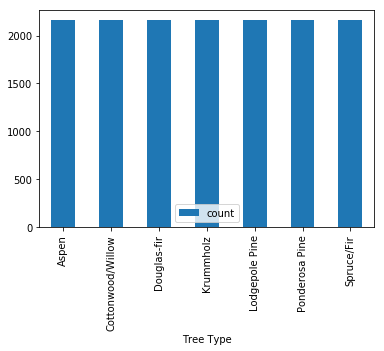

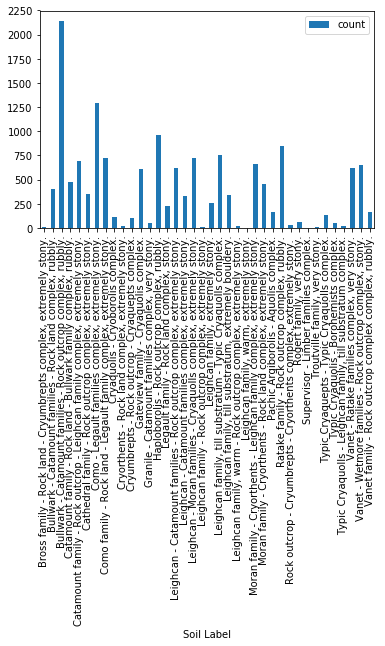

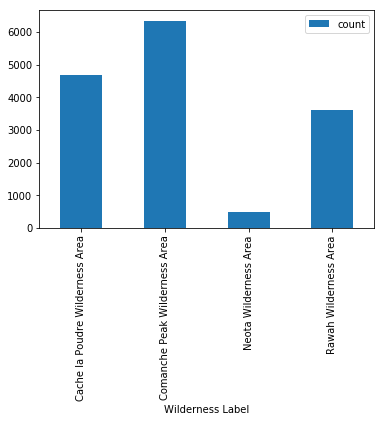

In [23]:
##### Data Exploration #####
#### Bar Chart
train_2.groupby('Tree Type')['Id'].agg(['count']).plot(kind='bar')
train.groupby('Soil Label')['Id'].agg(['count']).plot(kind='bar')
train.groupby('Wilderness Label')['Id'].agg(['count']).plot(kind='bar')

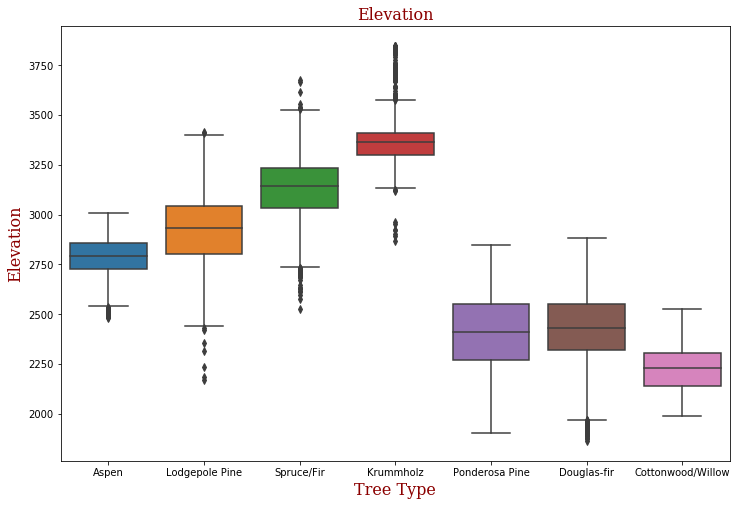

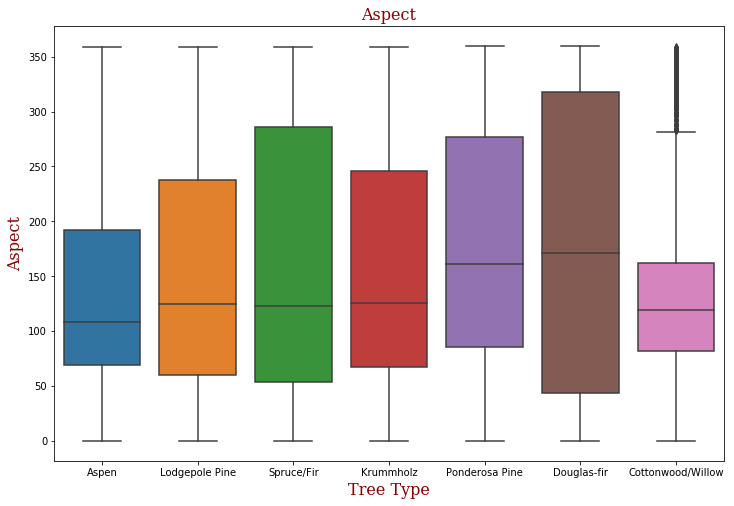

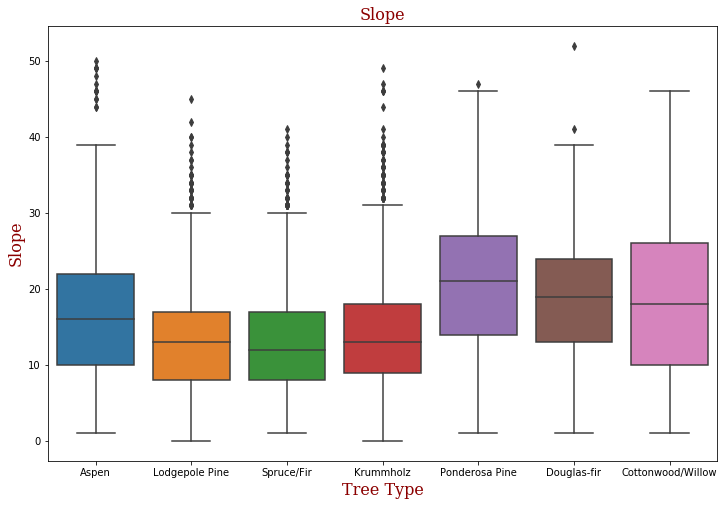

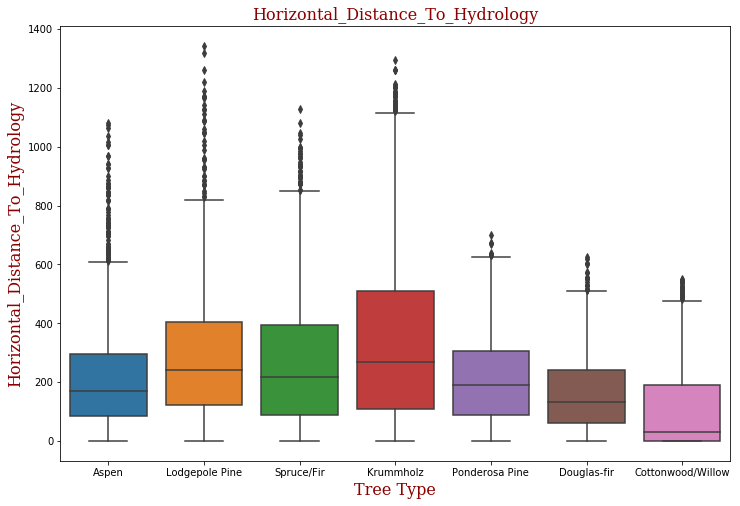

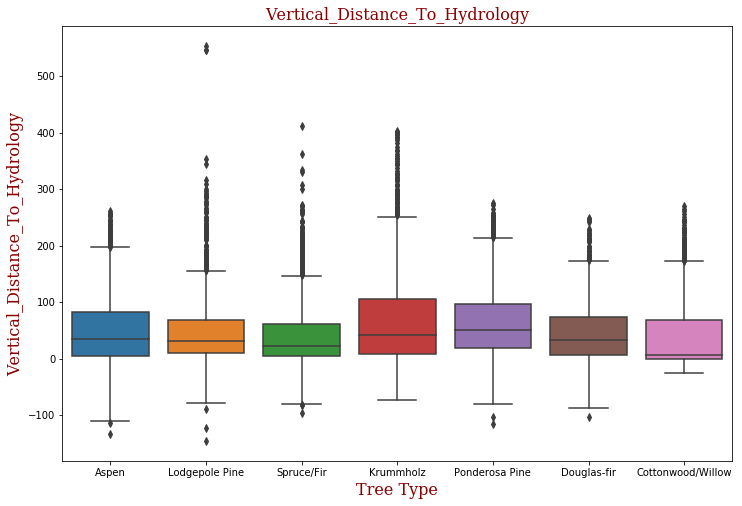

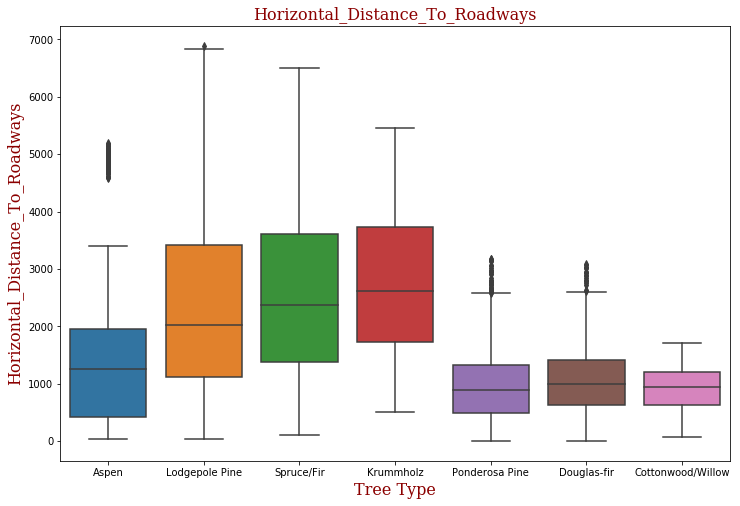

In [4]:
a=[]
for col in train.columns:
     #print(col)
     a.append(col)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
for x in a[1:7]:
    plt.figure(figsize=(12,8))
    ax = sns.boxplot(x="Tree Type", y=x, data=train_2)
    plt.title(x, fontdict=font)
    plt.xlabel('Tree Type', fontdict=font)
    plt.ylabel(x, fontdict=font)
    


In [16]:
train_2.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,key
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


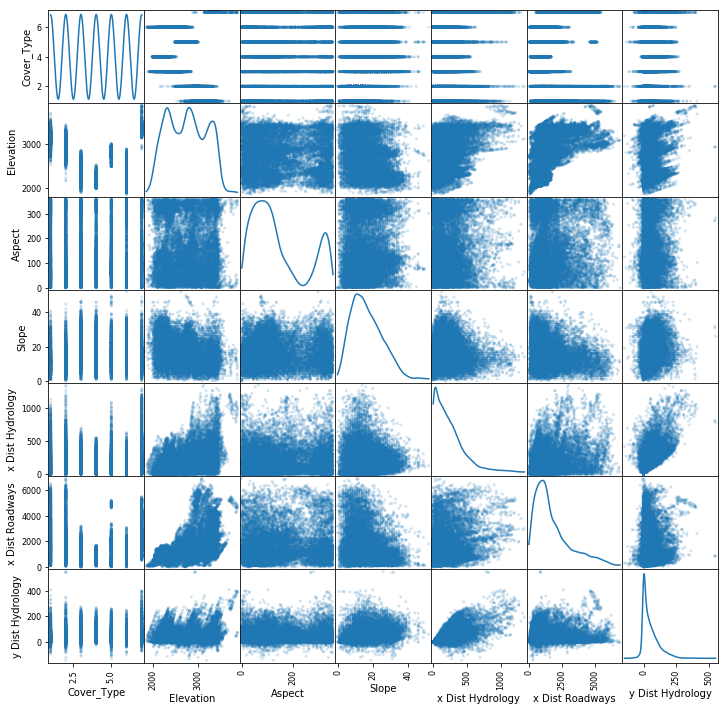

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

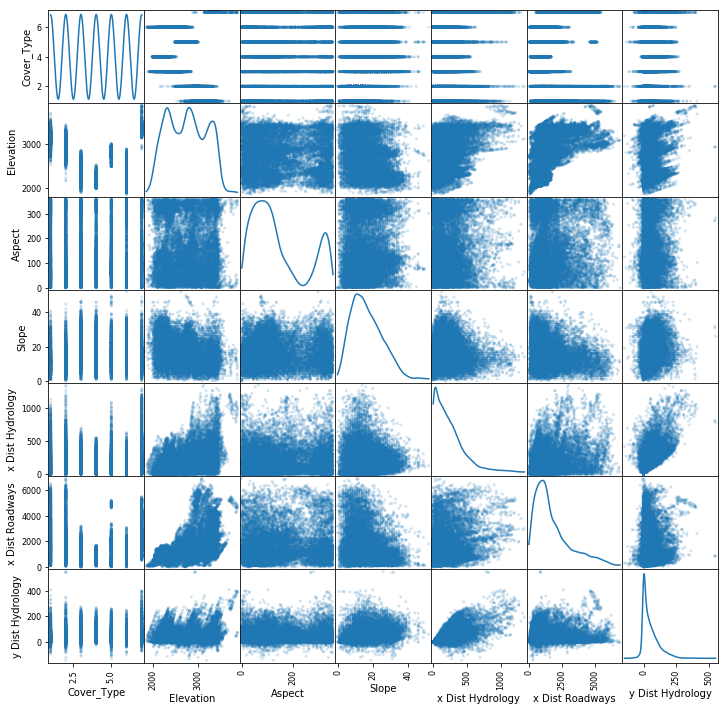

In [5]:
x=pld.scatter_matrix(tg[['Cover_Type','Elevation', 'Aspect', 'Slope','x Dist Hydrology','x Dist Roadways','y Dist Hydrology']],
                        alpha = 0.2, figsize = (12, 12), diagonal = 'kde')

plt.show(x)


In [ ]:
y=pld.scatter_matrix(tg[['Cover_Type','Elevation', 'Aspect', 'Slope','x Dist Hydrology','x Dist Roadways','y Dist Hydrology']],
                        alpha = 0.2, figsize = (12, 12), diagonal = 'hist')
plt.show(y)

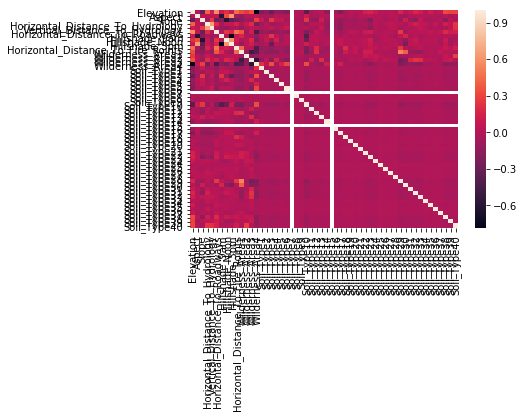

In [34]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = dependent.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
###### Actual Classifacation Model #######
X_train, X_test, y_train, y_test = train_test_split(
    train['Cover_Type'], tg['Cover_Type'], test_size=0.25, random_state=42)

In [43]:
for x in range(0, 4):
    print("We're on time %d" % (x))

We're on time 0
We're on time 1
We're on time 2
We're on time 3
